# Tarea examen 1: Derivación e integración numérica

__René Nicolás Quijada Romero__ (2023)

---

In [1]:
from pylab import *

## Ejercicio 1: Derivación por diferencias finitas. 

Segunda derivada con diferencias finitas. 

Para resolver este problema tenemos que elegir un punto arbitrario $x_{0}$, desarrollar en serie de Taylor y truncar hasta el cuarto término, despreciando así los que son mayores o iguales a $h⁵$. Repetimos estre proceso con dos puntos hacia adelante y dos puntos hacia atrás en un intervalo simétrico, o cuatro puntos hacia adelante en un intervalo no simétrico y teniendo un sistema de 4 ecuaciones y 4 incógnitas (las derivadas en los puntos de interés), resolvemos para aquella que deseamos.

En el apéndice se puede ver el desarrollo de este proceso hecho a mano. Ahora bien, programamos nuestro algoritmo:

In [2]:
def der_f2p(x,f): #La función recibe una cantidad de puntos x y sus imágenes en f en forma de listas
    f_prima = zeros_like(f) #Creamos una lista con espacio para cada punto a derivar
    h = x[1] - x[0] #Definimos el espaciado uniforme de la malla x como. 
    for i in range(2,len(f)-2): #Calculamos la derivada para los puntos interiores y excluimos al segundo y penúltimo.
        f_prima[i] = (16*f[i+1]+16*f[i-1]-30*f[i]-f[i+2]-f[i-2])/(12*(h**2)) #Del sistema de ecuaciones
    #Ahora calculamos la derivada en los puntos faltantes con la dedución del sistema de ecuaciones para adelante y 
    #para atrás
    f_prima[0] = (35*f[0]-104*f[1]+114*f[2]-56*f[3]+11*f[4])/(12*h**2)
    f_prima[1] = (35*f[1]-104*f[2]+114*f[3]-56*f[4]+11*f[5])/(12*h**2)
    f_prima[-1] = (35*f[-1]-104*f[-2]+114*f[-3]-56*f[-4]+11*f[-5])/(12*h**2) #No consideramos -h puesto que (-x)²=(x)²
    f_prima[-2] = (35*f[-2]-104*f[-3]+114*f[-4]-56*f[-5]+11*f[-6])/(12*h**2)

    
    return f_prima #Regresa la lista con la derivada numérica en cada punto

Además, consideramos el algortimo desarrollado en clase y la tarea 1 para calcular la primera derivada despreciando términos mayores o iguales a h⁵:

In [3]:
def der_h4(x,f): #La función recibe una cantidad de puntos x y sus imágenes en f en forma de listas
    f_prima = zeros_like(f) #Creamos una lista con espacio para cada punto a derivar
    h = x[1] - x[0] #Definimos el espaciado uniforme de la malla x como. 
    for i in range(2,len(f)-2): #Calculamos la derivada para los puntos interiores y excluimos al segundo y penúltimo.
        f_prima[i] = (-f[i+2] + 8*f[i+1]-8*f[i-1] + f[i-2])/(12*h) #Fórmula calculada con Taylor
    
    #Ahora calculamos la derivada en los puntos faltantes con la dedución del sistema de ecuaciones para adelante y 
    #para atrás
    f_prima[0] = (-25/12*f[0] + 4*f[1] - 3*f[2] +4/3*f[3] - 1/4*f[4])/h
    f_prima[1] = (-25/12*f[1] + 4*f[2] - 3*f[3] +4/3*f[4] - 1/4*f[5])/h
    f_prima[-1] = (-25/12*f[-1] + 4*f[-2] - 3*f[-3] +4/3*f[-4] - 1/4*f[-5])/(-h)
    f_prima[-2] = (-25/12*f[-2] + 4*f[-3] - 3*f[-4] +4/3*f[-5] - 1/4*f[-6])/(-h)
    
    return f_prima #Regresa la lista con la derivada numérica en cada punto

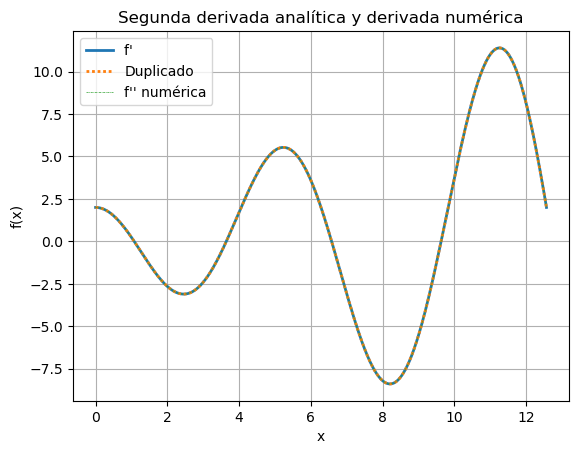

In [4]:
x = linspace(0, 4*pi, 100000) #Damos un dominio equiparticionado entre 0 y 4pi con 100 puntos
y = x*sin(x) # Creamos una lista con la función evaluada en cada punto del dominio

#----------------------------------------------Algoritmos para la segunda derivada----------------------------------------------
ddy = 2*cos(x)-x*sin(x) #Derivada analítica
derivada_h4 = der_f2p(x,y) #Evaluación con la derivada numérica

#----------------------------------------------Algoritmo para la primera aplicado dos veces-----------------------

ddy_p = der_h4(x,der_h4(x,y))

fig, ax = plt.subplots()
ax.set(title = 'Segunda derivada analítica y derivada numérica') #Título
ax.set(xlabel = 'x', ylabel = 'f(x)') #Ejes
plot(x, ddy, label = "f' ", linewidth = 2) #Analítica
plot(x, ddy_p, linestyle = (0, (1, 1)), label = "Duplicado", linewidth = 2) #Primero aplicado dos veces
plot(x, derivada_h4, linestyle = (0, (3, 1, 1, 1)), label = "f'' numérica", linewidth = 0.5) #Numérica
legend() #Leyenda
grid()
show() #Graficamos

Véase que las tres líneas se sobreponen muy bien. Ahora resolvamos el ejercicio que se nos pide:

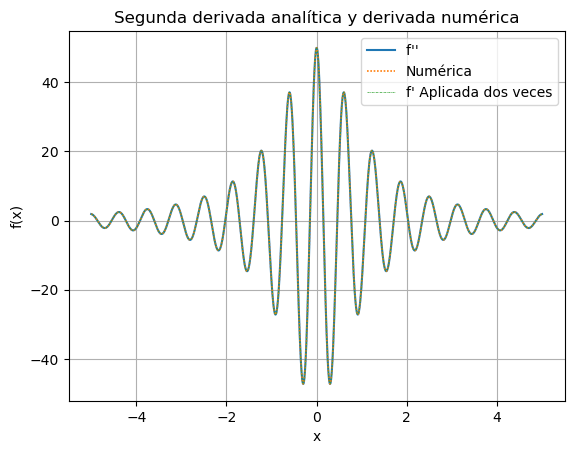

El error máximo entre la analítica y la numérica es de:  0.00019667619677221637  y el error máximo entre la analítica y la primera derivada aplicada dos veces es de:  0.0002641019032714187 .


In [5]:
x_dom = linspace(-5,5,1300)
y_ej = ((sin(5*x_dom))**2)/(x_dom**2+1)

#----------------------------------------------Algoritmos para la segunda derivada----------------------------------------------
dos_an = -(20*x_dom*(x_dom**2+1)*sin(10*x_dom)-(50*x_dom**4+97*x_dom**2+51)*cos(10*x_dom)-3*x_dom**2+1)/(x_dom**2+1)**3 #Derivada analítica
dos_num = der_f2p(x_dom,y_ej) #Evaluación con la derivada numérica

#----------------------------------------------Algoritmo para la primera aplicado dos veces-----------------------

dup_num = der_h4(x_dom,der_h4(x_dom,y_ej))

fig, ax = plt.subplots()
ax.set(title = 'Segunda derivada analítica y derivada numérica') #Título
ax.set(xlabel = 'x', ylabel = 'f(x)') #Ejes
plot(x_dom, dos_an, label = "f'' ", linewidth = 1.5) #Analítica
plot(x_dom, dos_num, linestyle = (0, (1, 1)), label = "Numérica", linewidth = 1.2) #Numérica
plot(x_dom, dup_num, linestyle = (0, (3, 1, 1, 1)), label = "f' Aplicada dos veces", linewidth = 0.5) #Duplicada
legend() #Leyenda
grid()
show() #Graficamos

print("El error máximo entre la analítica y la numérica es de: ", max(dos_num-dos_an), " y el error máximo entre la analítica y la primera derivada aplicada dos veces es de: ", max(dos_num-dup_num), ".")

En efecto, las líneas se vuelven a sobreponer muy bien y además notamos que para $1300$ puntos ya tenemos una precisión de $10^{-4}$ para el algoritmo nuevo respecto a la aplicación del primer algoritmo dos veces, por lo que el nuevo algoritmo resulta mejor.

De acuerdo con nuestra gráfica, el error de ambos métodos cae al mismo ritmo, por lo que para efectos de los cálculos y órdenes de magnitud trabajados aquí pueden ser considerados equivalentes. Se esperaría, sin embargo, que la aplicación de la primera derivada dos veces tuviera menor precisión a la aplicación del algoritmo de segunda derivada desde cero puesto que acarrearía el error inicial de la primera derivada.

---

## Ejercicio 2: integración numérica con Bode

En este ejercicio se implementan dos algoritmos para encontrar las integrales solicitadas con una precisión de $10^{-4}$. La estrategia es la siguiente:

- Partir un intervalo en 3 o 4 subintervalos (según sea el caso) el intervalo donde se realiza la integral.
- Dados 3 o 4 puntos, según sea el caso, calcular la integral de la función en él. 
- Sumar las integrales de cada subintervalo (uno solo en el primer paso)
- Si la precisión no es la requerida, tomar cada subintervalo y repetir el proceso.

Primero implementamos el algoritmo de Bode para el cálculo de la integral en un intervalo dividido en 4 subintervalos:

$$\int_{x_{0}}^{x_{1}}{f(x)dx} \approx \frac{2h}{45}((7f_{0} + 32f_{1} + 12f_{2} + 32f_{3} + 7f_{4}))$$



Damos un bloque que contenga el algoritmo para implementarlo en el bloque de código de wrap-up.

In [6]:
def integrador(f, dom): #Definición de la función
    h = dom[1] - dom[0] #Distancia entre dos puntos sucesivos
    f_ev = f(dom) #Se toma la función y se evalúa en los puntos de evaluación del algoritmo. Se da como arreglo.
    return 2*h/45*(7*f_ev[0] + 32*f_ev[1]+ 12*f_ev[2] + 32*f_ev[3] + 7*f_ev[4])  #Se realiza el cálculo

Damos nuestro integrador

In [7]:
def mi_integrador(f, i0, i1): #Recibe una función, y los límites inferior y superior de integración
    curva = [] #Lista donde guardaremos la cantidad de particiones y el valor de la integral para estas
    dompts = array([i0, i1])
    dom = linspace(i0, i1, 5) #Se divide el intervalo en 5 puntos (4 subintervalos) y se asigna a un arreglo
    integral = integrador(f, dom) #Se evalúa la primera integral
    curva.append([1, integral])
    for i in range(0,12): #El proceso de iteración se realiza, a lo más, nueve veces
        iteracion = i + 1
        intprov = 0 #En cada iteración se inicia una integral provisional
        provdom = array([dompts[0]]) #El primer punto de los nuevos puntos de integración es el primero del anterior
        delta = (dompts[1] - dompts[0])/2
        for j in range(0,len(dompts)-1): #Para cada elemento en el dominio de puntos excepto el último
            pardom1 = linspace(dompts[j], dompts[j] + delta, 5) #Partición de la primera mitad
            intprov += integrador(f, pardom1) #Se suma la integral del subintervalo a la integral provisional
            pardom2 = linspace(dompts[j] + delta, dompts[j+1], 5)
            intprov += integrador(f, pardom2)
            provdom = append(provdom, [dompts[j] + delta, dompts[j+1]]) #Al nuevo intervalo de cada iteración se agregan los sub-subintervalos
        dompts = provdom #Tras acabar las sub-iteraciones se definen los nuevos puntos de integración
        intint = intprov #La integral de la iteración es la suma de todas las integrales pasadas
        curva.append([2**(iteracion), intint]) #Se agrega el par de datos a la lista
        numitera = i+1
        if abs(intint - integral) < 10**-4: #Si el error es menor a 10⁻⁴, entonces
            integral = intint #La integral deseada es la integral de la iteración i-ésima
            break
        else:
            integral = intint
            continue #Si el error es mayor al deseado, se sigue con el proceso
    return integral, curva, numitera #Se regresa la integral y la cantidad de iteraciones realizadas

In [8]:
def curva_datos(datos):
    particiones = [par[0] for par in datos]
    integrales = [par[1] for par in datos]
    return particiones, integrales

Probamos el algoritmo con la siguiente función de prueba:

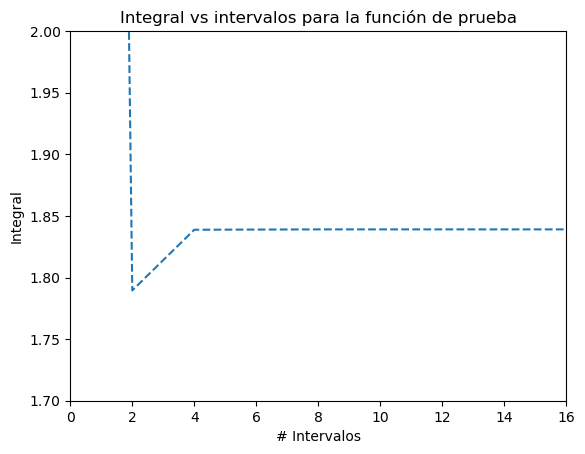

In [9]:
prueba = mi_integrador(sin, 0, 10) #Se prueba mi integrador con la función seno en el intervalo 0 a 3
A = curva_datos(prueba[1]) #Extraemos el valor de las integral en cada iteración


fig, ax = plt.subplots()
ax.set(title = 'Integral vs intervalos para la función de prueba') #Título
ax.set(xlabel = '# Intervalos', ylabel = 'Integral') #Ejes
ax = plt.gca() #Ejes
ax.set_xlim([0, max(A[0])]) #Definimos el valor máximo en X
ax.set_ylim([1.7, 2]) #Definimos el valor máximo en Y
plot(A[0], A[1], "--")
show()

Notamos que con dos subintervalos nuestra curva de convergencia ya parece una línea constante. Además, El valor coincide con el resultado analítico de $2$ con un error menor a $10^{-4}$, tal como se esperaba. Ahora procedemos a trabajar con las integrales de la tarea-examen.

El valor de la integral es:  0.7853981652856409  y se realizaron  2  iteraciones. :)


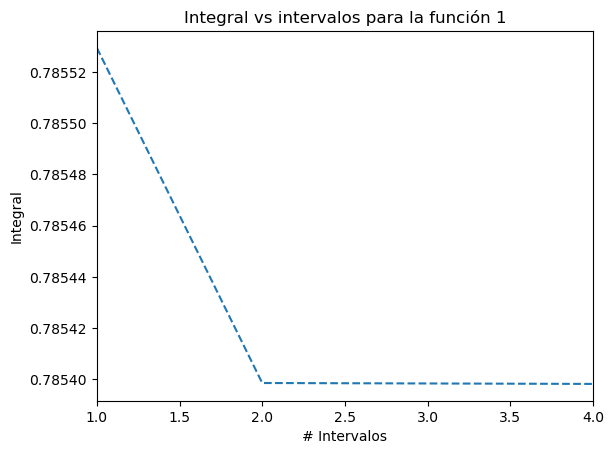

In [10]:
def f1(x):
    return 1/(1+x**2)

p1 = mi_integrador(f1, 0, 1)
print ("El valor de la integral es: ", str(p1[0]), " y se realizaron ", str(p1[2]), " iteraciones. :)")

d1 = curva_datos(p1[1]) #Extraemos el valor de las integral en cada iteración
fig, ax = plt.subplots()
ax.set(title = 'Integral vs intervalos para la función 1') #Título
ax.set(xlabel = '# Intervalos', ylabel = 'Integral') #Ejes
ax = plt.gca() #Ejes
ax.set_xlim([min(d1[0]), max(d1[0])]) #Definimos el valor máximo en X
plot(d1[0], d1[1], "--")
show()

El valor de la integral es:  1.1544485204571149  y se realizaron  3  iteraciones. :)


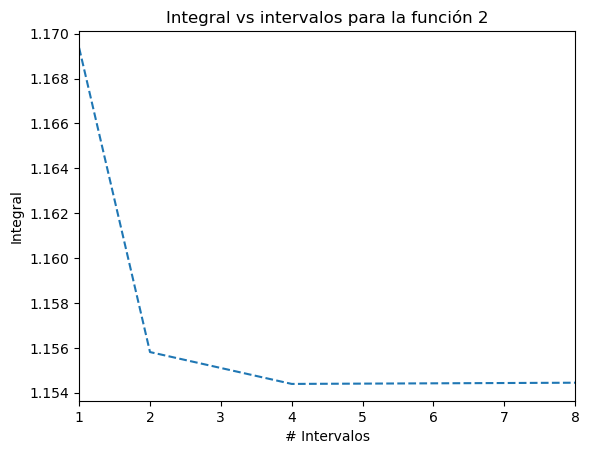

In [11]:
def f2(x):
    return 1/(1+x**3)

p2 = mi_integrador(f2, 0, 3)

print ("El valor de la integral es: ", str(p2[0]), " y se realizaron ", str(p2[2]), " iteraciones. :)")

d2 = curva_datos(p2[1]) #Extraemos el valor de las integral en cada iteración
fig, ax = plt.subplots()
ax.set(title = 'Integral vs intervalos para la función 2') #Título
ax.set(xlabel = '# Intervalos', ylabel = 'Integral') #Ejes
ax = plt.gca() #Ejes
ax.set_xlim([min(d2[0]), max(d2[0])]) #Definimos el valor máximo en X
plot(d2[0], d2[1], "--")
show()

El valor de la integral es:  0.021294354054721146  y se realizaron  1  iteraciones. :)


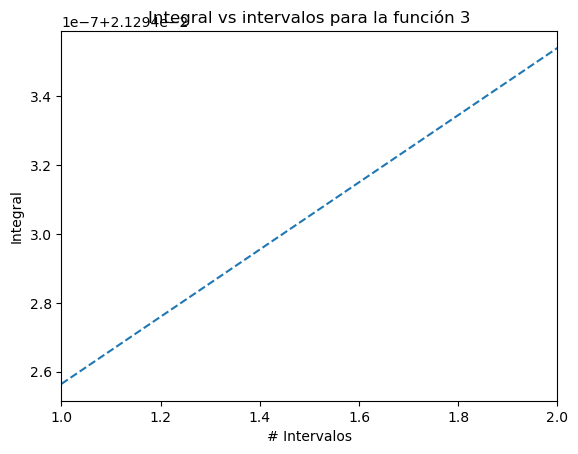

In [12]:
def f3(x):
    return sin(x**2)

p3 = mi_integrador(f3, 0, 0.4)

print ("El valor de la integral es: ", str(p3[0]), " y se realizaron ", str(p3[2]), " iteraciones. :)")

d3 = curva_datos(p3[1]) #Extraemos el valor de las integral en cada iteración
fig, ax = plt.subplots()
ax.set(title = 'Integral vs intervalos para la función 3') #Título
ax.set(xlabel = '# Intervalos', ylabel = 'Integral') #Ejes
ax = plt.gca() #Ejes
ax.set_xlim([min(d3[0]), max(d3[0])]) #Definimos el valor máximo en X
plot(d3[0], d3[1], "--")
show()

El valor de la integral es:  1.9224220489800765  y se realizaron  2  iteraciones. :)


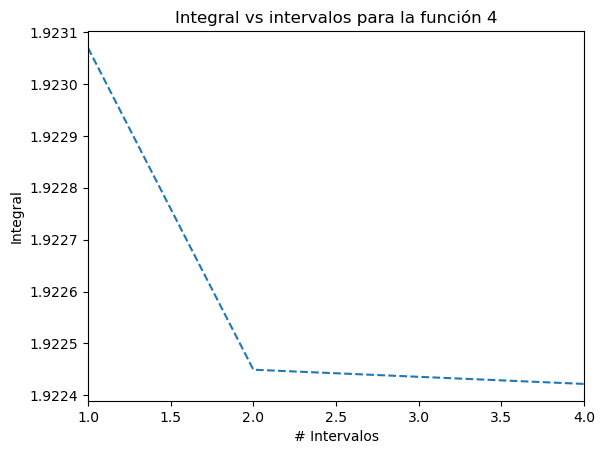

In [13]:
def f4(x):
    return 1/log(x)

p4 = mi_integrador(f4, 2, 4)

print ("El valor de la integral es: ", str(p4[0]), " y se realizaron ", str(p4[2]), " iteraciones. :)")

d4 = curva_datos(p4[1]) #Extraemos el valor de las integral en cada iteración
fig, ax = plt.subplots()
ax.set(title = 'Integral vs intervalos para la función 4') #Título
ax.set(xlabel = '# Intervalos', ylabel = 'Integral') #Ejes
ax = plt.gca() #Ejes
ax.set_xlim([min(d4[0]), max(d4[0])]) #Definimos el valor máximo en X
plot(d4[0], d4[1], "--")
show()

El valor de la integral es:  0.2642410894848887  y se realizaron  1  iteraciones. :)


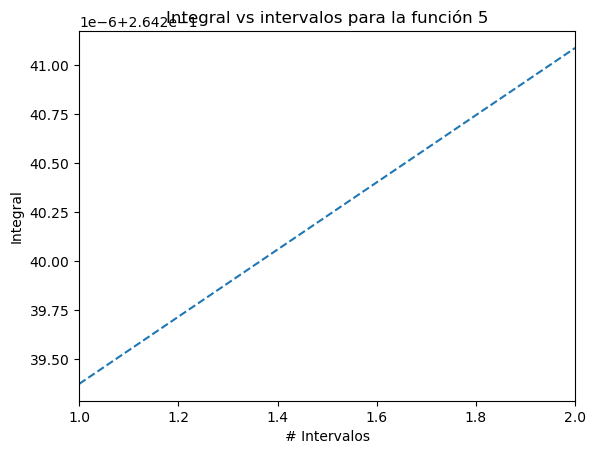

In [14]:
def f5(x):
    return x*exp(-x)
p5 = mi_integrador(f5, 0, 1)

print ("El valor de la integral es: ", str(p5[0]), " y se realizaron ", str(p5[2]), " iteraciones. :)")

d5 = curva_datos(p5[1]) #Extraemos el valor de las integral en cada iteración
fig, ax = plt.subplots()
ax.set(title = 'Integral vs intervalos para la función 5') #Título
ax.set(xlabel = '# Intervalos', ylabel = 'Integral') #Ejes
ax = plt.gca() #Ejes
ax.set_xlim([min(d5[0]), max(d5[0])]) #Definimos el valor máximo en X
plot(d5[0], d5[1], "--")
show()



Las integrales obtenidas tienen los valores esperados de acuerdo con otras calculadoras en línea. Además, salvo por la segunda función propuesta siempre se requirieron 2 subintervalos. Para la segunda, 4 subintervalos.

---

   
  ## Ejercicio 3: logartimo
  
 En este ejercicio construiremos una función que nos dé el logaritmo de un número y, posteriormente, de un arreglo de números a partir de la definición de integral.
 
 Entonces:
 
 $$
 \ln(x):=\int_{0}^{x}{\frac{1}{t}dt}
 $$
 
 ---
 


Usaremos nuestro algoritmo del ejercicio anterior y con esto terminamos:

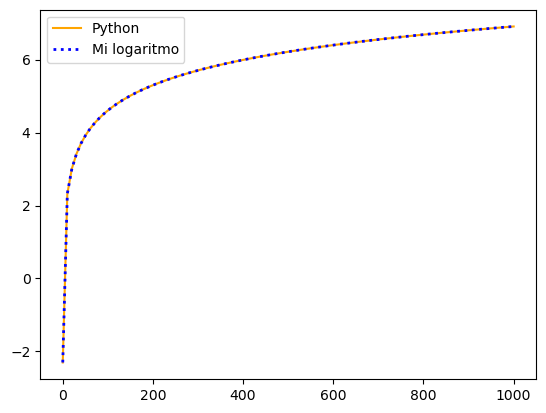

Según nuestro algoritmo, el valor de ln(e) es:  1.0000003137232836 .
Y el error máximo entre estas dos es de  3.0696694066634223e-06


In [15]:
def mi_ln(supp): #La función recibe un valor racional como entrada
    def rec(x): #Es la función con la que se calcula le logaritmo natural
        return 1/x 
    if type(supp) == ndarray: #Si la entrada es un arreglo de números
        sol = zeros_like(supp) #Guardaremos la solución en otro arreglo
        for i in range(0,len(supp)): #Para cada número en la lista pedida
            sol[i] = mi_integrador(rec, 1, supp[i])[0] #Calculamos la solución con la integral 
        return sol
    else: #Si es un número
        return mi_integrador(rec,1,supp) #Calculamos directamente

dom = linspace(0.1,1000,100) #Definimos el intervalo de interés
y = mi_ln(dom) #Calculamos con nuestra función

plot(dom, log(dom), label = "Python", color = "orange", linestyle = "-") #Graficamos la versión de python
plot(dom, y, label = "Mi logaritmo", linestyle =":", linewidth = 2, color = "blue") #GRaficamos nuestra versión
legend()
show()

print("Según nuestro algoritmo, el valor de ln(e) es: ", str(mi_ln(e)[0]), ".") 

print("Y el error máximo entre estas dos es de ", str(max(y-log(dom))))

Vemos que las dos funciones se asemejan muy bien y que, de hecho, el error es del orden de $10^{-6}$, siendo mejor que lo esperado.

---

#### ¡Eso es todo! :)